Q1) Exploring lc files:
Importing the necessary packages


In [3]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Reading the .lc files


In [4]:
m1=fits.open('Data1.lc')
m2=fits.open('Data2.lc')
m3=fits.open('Data3.lc')
m4=fits.open('Data4.lc')
m5=fits.open('Data5.lc')
print(m1.info())




Filename: Data1.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   
None


In [5]:
m1[0].header


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsmgenlc '          / Creator of file                                
FILENAME= 'ch2_xsm_20210923_v1_level2.lc' / Name of file                        
CONTENT = 'Light curve'     

In [6]:
(m1[1].header)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                84280 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'ERROR   '        

The required data is at index 1(count rate,time,etc)

In [7]:
m1_data = m1[1].data
print("Required Data:")
print(m1_data)
print(m1_data.shape, m1_data.dtype)

Required Data:
[(1.49126401e+08, 494.83276, 22.244837, 1.)
 (1.49126402e+08, 518.2688 , 22.765518, 1.)
 (1.49126403e+08, 504.4697 , 22.460403, 1.) ...
 (1.49212797e+08, 376.00684, 19.390896, 1.)
 (1.49212798e+08, 374.12167, 19.342226, 1.)
 (1.49212799e+08, 401.34076, 20.033491, 1.)]
(84280,) (numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')])


Q2) Lightcurves


In [8]:
m_complete = [m1,m2,m3,m4,m5]

The lightcurves have a peak (count rate peak) at certain instants signifying the flares.
Plotting all 5 curves separately:




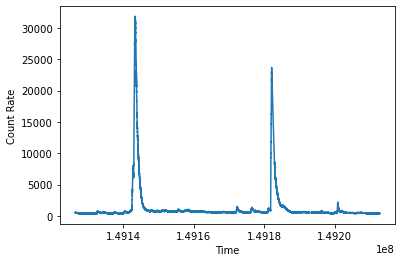

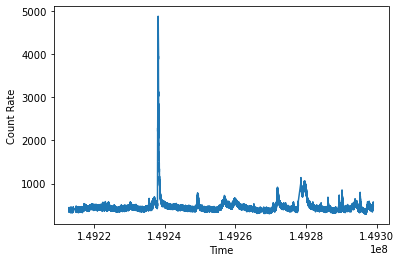

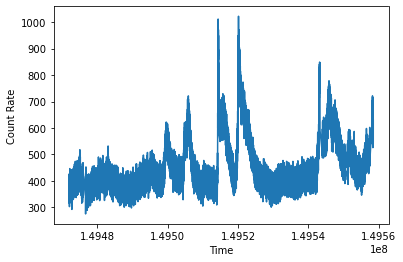

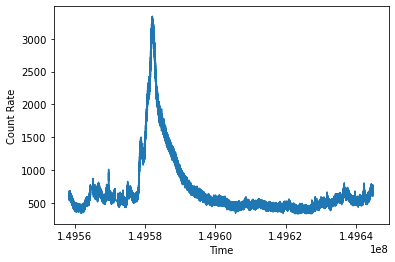

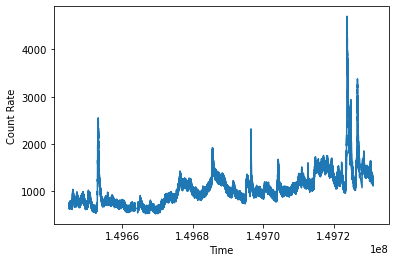

In [9]:
for m in m_complete:
    plt.subplots(1, 1)
    plt.plot(m[1].data['TIME'],m[1].data['RATE'])
    plt.xlabel("Time")
    plt.ylabel("Count Rate")

Peculiarity regarding time axis- Plotting all these graphs together:

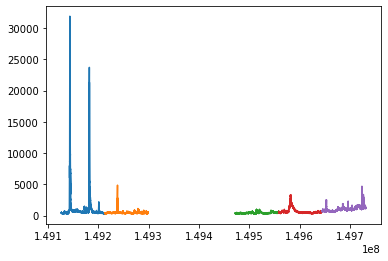

In [10]:
for m in m_complete:
    plt.plot(m[1].data['TIME'],m[1].data['RATE'])

Observations: It has a discontinuity between t=1.493 and 1.4945 $*$ $10^{8}$ seconds. The time axis also doesn't start from 0.



Q3) Identifying the flares


Widening each plot to see the start and end of the count rate peak:


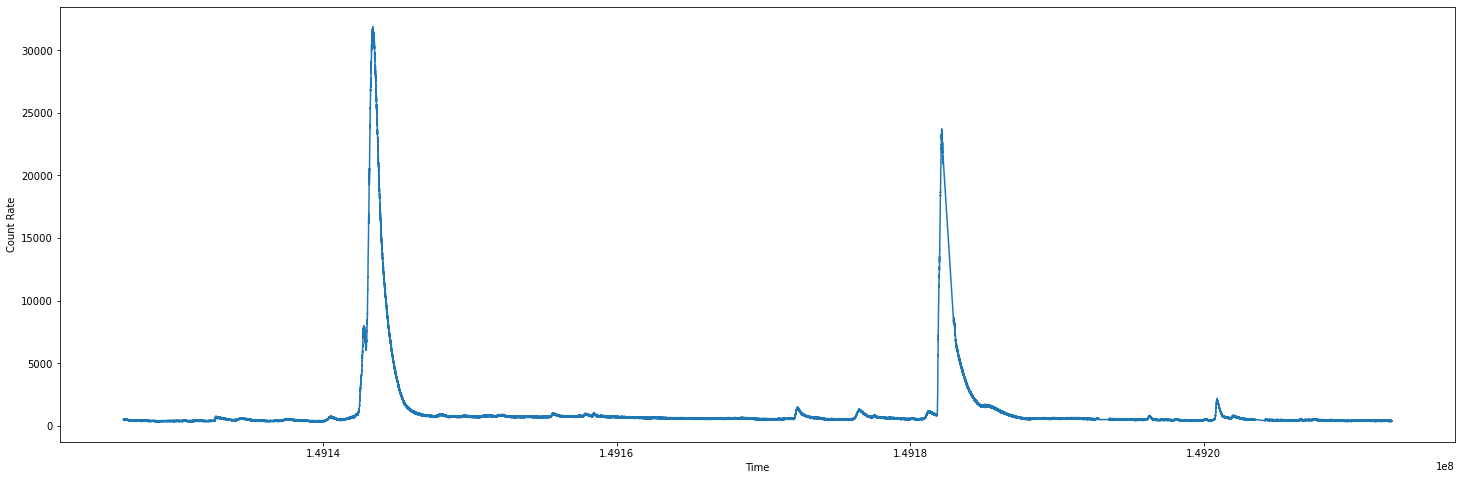

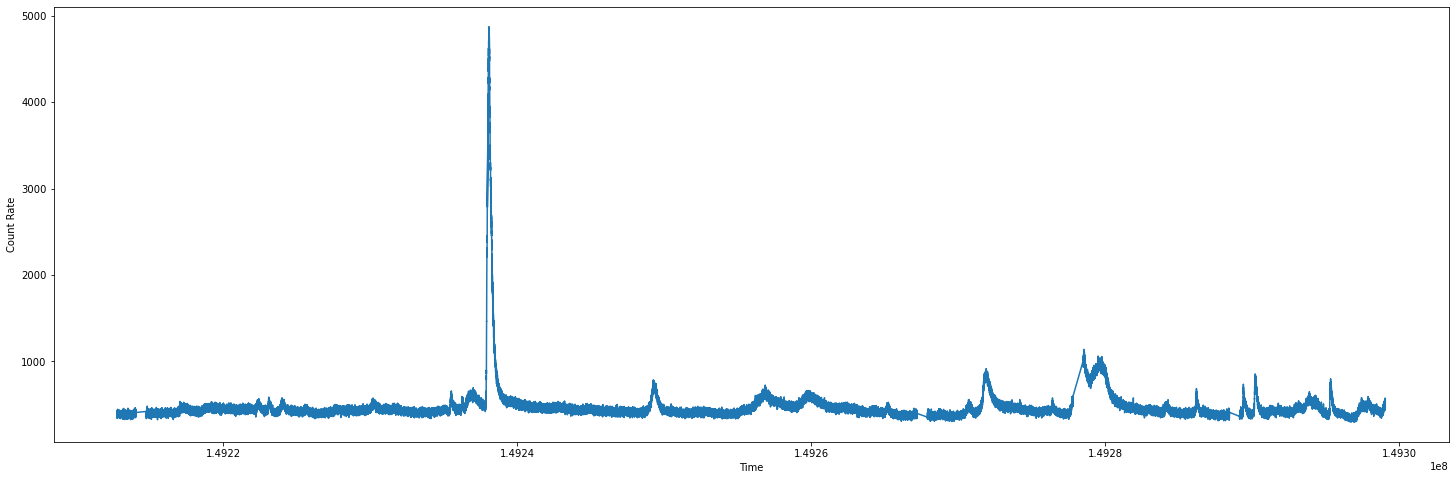

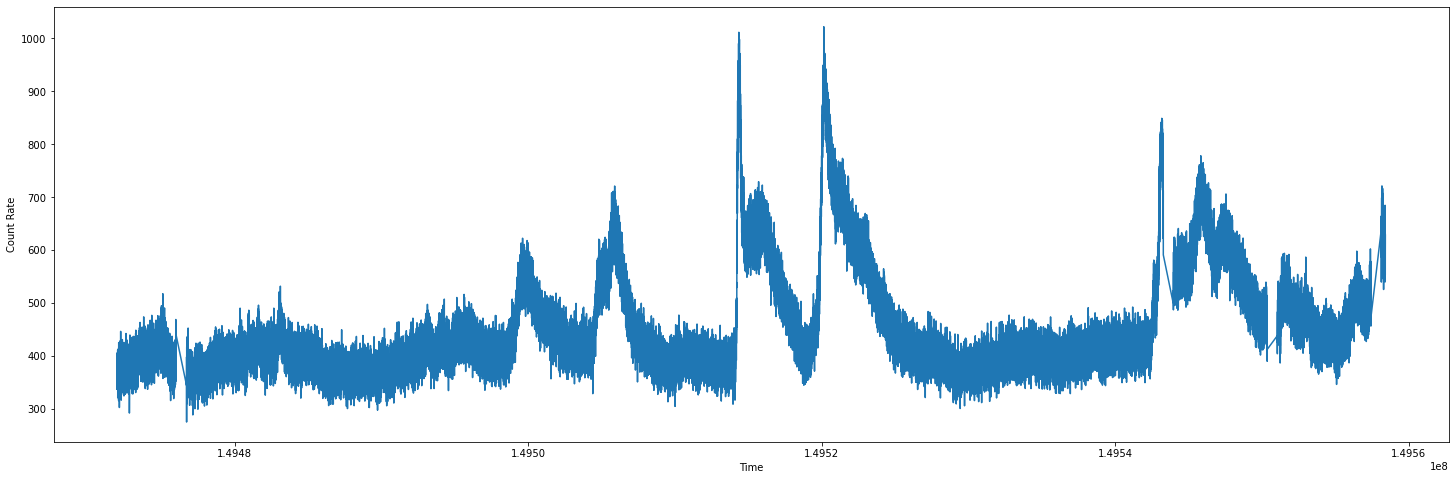

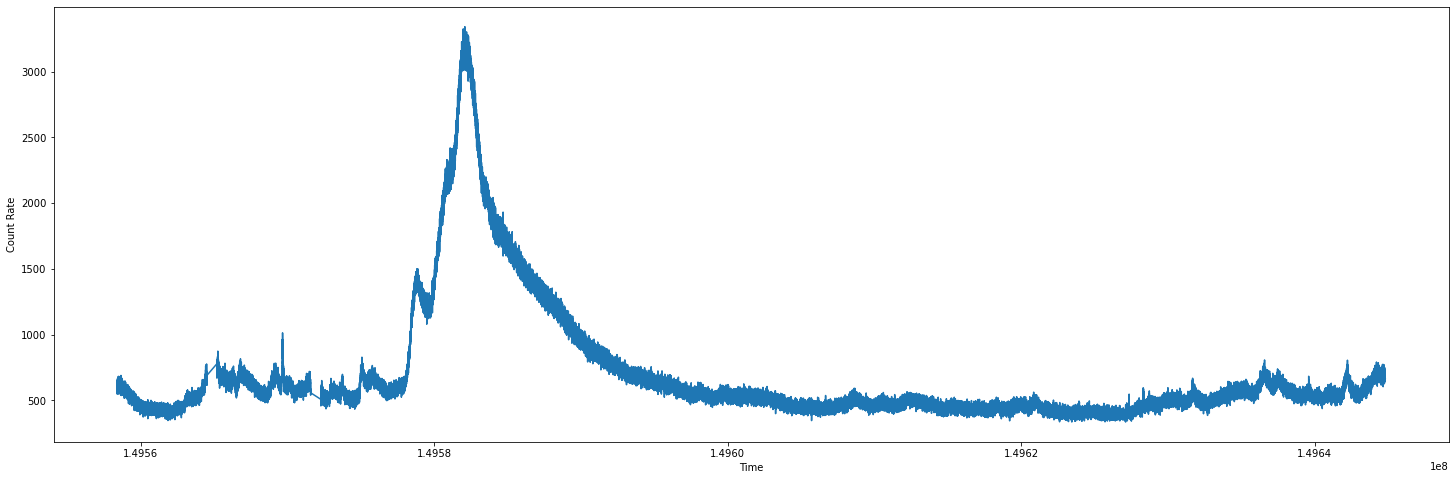

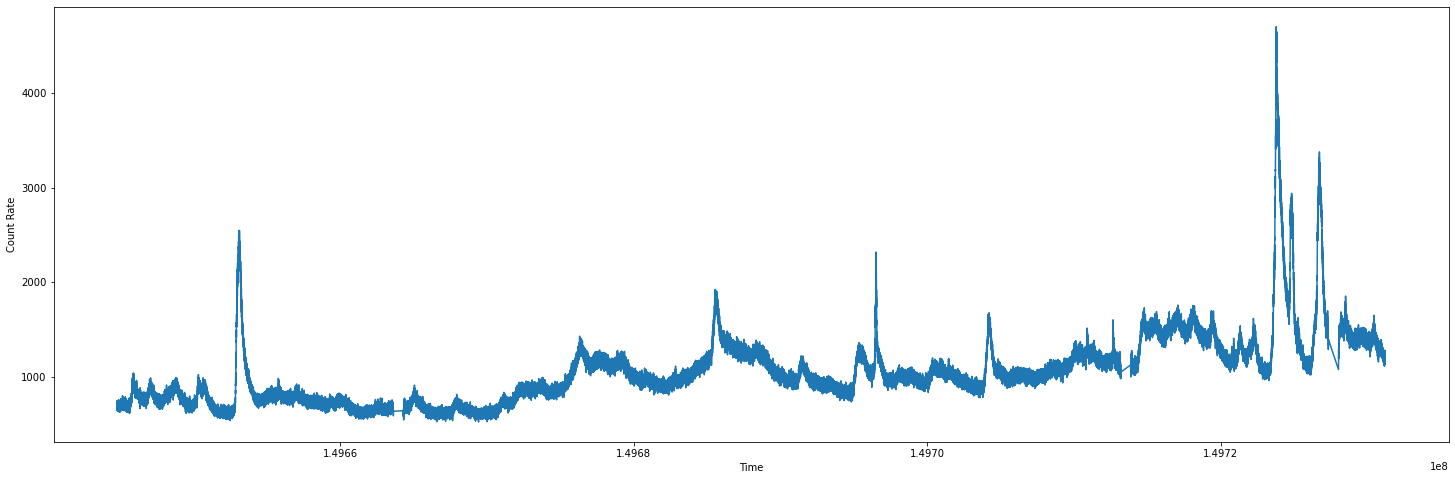

In [11]:
for m in m_complete:
    plt.subplots(1, 1, figsize =(25,8)) 
    plt.plot(m[1].data['TIME'],m[1].data['RATE'])
    plt.xlabel("Time")
    plt.ylabel("Count Rate")

Approximate start and end times for the 1st lc file(in terms of $10^{8}$ secs)-


| Flare | Start    | End      |
|-------|----------|----------|
| 1st   | 1.491423 | 1.491453 |
| 2nd   | 1.491815  | 1.4918475  |

These figures were obtained by trial and error.

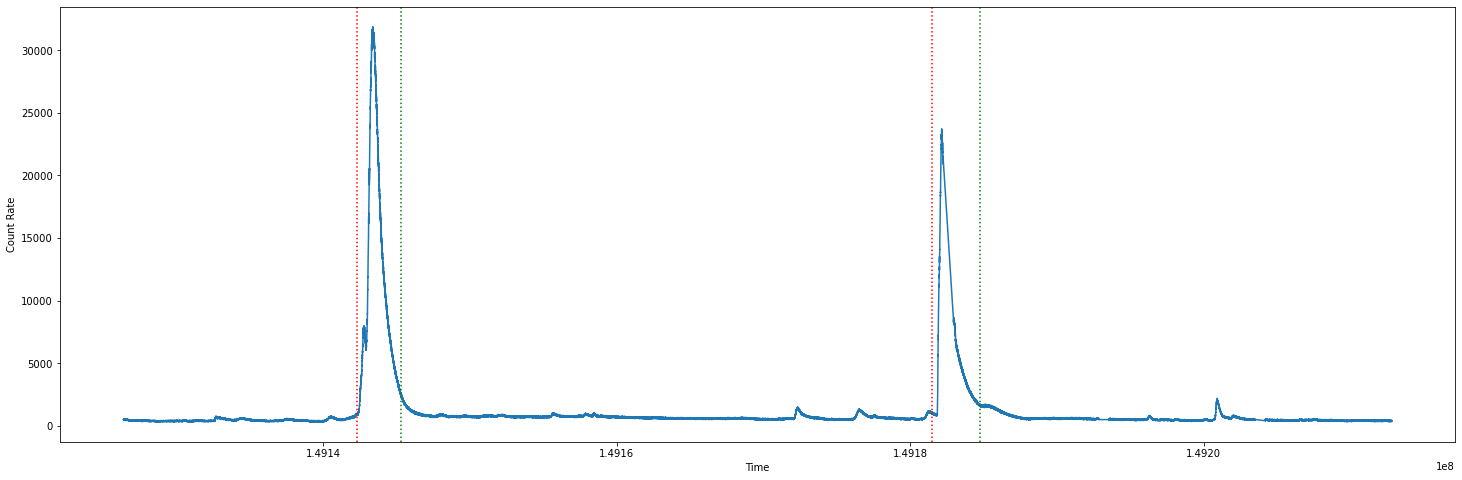

In [12]:
plt.subplots(1, 1, figsize = (25, 8))
plt.plot(m1[1].data['TIME'],m1[1].data['RATE'])
plt.xlabel("Time")
plt.ylabel("Count Rate")
plt.axvline(1.491423e8, color = 'red', linestyle  = 'dotted')
plt.axvline(1.491453e8, color = 'green', linestyle = 'dotted')
plt.axvline(1.491815e8, color = 'red', linestyle = 'dotted')
plt.axvline(1.4918475e8, color = 'green' , linestyle = 'dotted')

c) Calculating the required properties-(For the 2 flares in the first lc file)

In [13]:
f1start = 1.491423e8
f1end = 1.491453e8
f2start = 1.491815e8
f2end = 1.4918475e8
f1total = np.intersect1d(np.where(m1[1].data['TIME'] > f1start),np.where(m1[1].data['TIME'] < f1end))
f2total = np.intersect1d(np.where(m1[1].data['TIME'] > f2start),np.where(m1[1].data['TIME'] < f2end))
#f1total , f2total represents the array containing data during the period of the respective flare

Mean Count Rate in the Flare Window

In [14]:
print("The mean count rate during the 1st flare is", np.mean(m1[1].data['RATE'][f1total]))
print("The mean count rate during the 2nd flare is", np.mean(m1[1].data['RATE'][f2total]))

The mean count rate during the 1st flare is 11739.486
The mean count rate during the 2nd flare is 5300.033


Peak Count Rate in the Flare Window


In [15]:
print("The peak count rate during the 1st flare is", np.amax(m1[1].data['RATE'][f1total]))
max1= np.amax(m1[1].data['RATE'][f1total])
print("The peak count rate during the 2nd flare is", np.amax(m1[1].data['RATE'][f2total]))
max2=np.amax(m1[1].data['RATE'][f2total])

The peak count rate during the 1st flare is 31883.889
The peak count rate during the 2nd flare is 23705.484


Average slope of rise


In [16]:
def slope(ymax,y0,xmax,x0):
    return (ymax-y0)/(xmax-x0)
x0=m1[1].data['RATE'][f1total][0]
xmax=np.argmax(m1[1].data['RATE'][f1total])
print("The average slope of rise in the 1st flare is", slope(max1,m1[1].data['RATE'][f1total][0],m1[1].data['TIME'][f1total][xmax],f1start))
x0=m1[1].data['RATE'][f2total][0]
xmax=np.argmax(m1[1].data['RATE'][f2total])
print("The average slope of rise in the 2nd flare is", slope(max2,m1[1].data['RATE'][f2total][0],m1[1].data['TIME'][f2total][xmax],f2start))

The average slope of rise in the 1st flare is 28.56758938562348
The average slope of rise in the 2nd flare is 35.190148182311276


Average slope of fall


In [17]:
print("The average slope of rise in the 1st flare is", np.absolute(slope(max1,m1[1].data['RATE'][f1total][-1],m1[1].data['TIME'][f1total][xmax],f1end)))
print("The average slope of rise in the 2nd flare is", np.absolute(slope(max2,m1[1].data['RATE'][f2total][-1],m1[1].data['TIME'][f2total][xmax],f2end)))

The average slope of rise in the 1st flare is 12.407182625309288
The average slope of rise in the 2nd flare is 8.475424373394137


Mean Background Rate


In [18]:
bg=[]
for i in range(len(m1[1].data['TIME'])):
    if (m1[1].data['TIME'][i] in f1total or m1[1].data['TIME'][i] in f2total):
        continue
    else:
        bg.append(i)
print("The mean background rate is ", np.mean(m1[1].data['RATE'][bg]))

The mean background rate is  1151.8309


The mean background rate is ~27 times smaller than the mean of the first flare and ~20.5 times smaller than the mean of the second flare